A Survey on Technology Choice
======


In [48]:
# For nicer printing
options(digits=2);

In [49]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);
print(colnames(data))


 [1] "Device"        "Completed"     "Start"         "End"          
 [5] "PG0Dis"        "PG0Shown"      "PG0Submit"     "PG1PsnUse"    
 [9] "PG1WdAuth"     "PG1Trn"        "PG1Other"      "PG1Submit"    
[13] "PG2Resp"       "PG2Submit"     "PG2Resp.1"     "PG3Submit"    
[17] "PG4Dtr0_6"     "PG4Psv7_8"     "PG4Prm9_10"    "PG4AllResp"   
[21] "PG4Submit"     "PG5_1RRPQ"     "PG5_1Order"    "PG5_1Time"    
[25] "PG5_2BNUI"     "PG5_2Order"    "PG5_2Time"     "PG5_3HDS"     
[29] "PG5_3Order"    "PG5_3Time"     "PG5_4VGP"      "PG5_4Order"   
[33] "PG5_4Time"     "PG5_5PHR"      "PG5_5Order"    "PG5_5Time"    
[37] "PG5_6SSYOP"    "PG5_6Order"    "PG5_6Time"     "PG5_7NDYP"    
[41] "PG5_7Order"    "PG5_7Time"     "PG5_8CP"       "PG5_8Order"   
[45] "PG5_8Time"     "PG5_9FRP"      "PG5_9Order"    "PG5_9Time"    
[49] "PG5_10RPA"     "PG5_10Order"   "PG5_10Time"    "PG5_11NSG"    
[53] "PG5_11Order"   "PG5_11Time"    "PG5_12NWG"     "PG5_12Order"  
[57] "PG5_12Time"    "PG5_13NFG"  

In [50]:
#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [51]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

In [52]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,...,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,...,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,...,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,...,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,...,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,...,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,...,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,...,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,...,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,...,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,...,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


### Simple questions

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?

In [27]:
library(MASS)
library(dplyr)
library(tidyr)
library(caret)
library(datasets)

In [28]:
data_complete = filter(data, Completed == TRUE)
survey_time = data_complete$End - data_complete$Start
print(paste0("Completed Survey: ", length(d$End)))
print(paste0("Opened Survey: ", length(data_complete$End)))

[1] "Completed Survey: 1353"
[1] "Opened Survey: 805"


In [29]:
print(paste0("Max Survey: ", max(survey_time), ' Seconds'))
print(paste0("Min Survey: ", min(survey_time), ' Seconds'))
print(paste0("Average Survey: ", round(mean(survey_time)), ' Seconds'))
print(paste0("Median Survey: ", median(survey_time), ' Seconds'))

[1] "Max Survey: 87551 Seconds"
[1] "Min Survey: 51 Seconds"
[1] "Average Survey: 680 Seconds"
[1] "Median Survey: 225 Seconds"


In [30]:
#get mean for each variable
means <- c()

q0 <- data[,"PG0Submit"]
means <- c(means, mean(q0, na.rm = TRUE))

q1 <- data[,"PG1Submit"]
means <- c(means, mean(q1, na.rm = TRUE))

q2 <- data[,"PG2Submit"]
means <- c(means, mean(q2, na.rm = TRUE))

q3 <- data[,"PG3Submit"]
means <- c(means, mean(q3, na.rm = TRUE))

q4 <- data[,"PG4Submit"]
means <- c(means, mean(q4, na.rm = TRUE))

q5 <- data[,"PG5Submit"]
means <- c(means, mean(q5, na.rm = TRUE))

q6 <- data[,"PG6Submit"]
means <- c(means, mean(q6, na.rm = TRUE))

q7 <- data[,"PG7Submit"]
means <- c(means, mean(q7, na.rm = TRUE))

q8 <- data[,"PG8Submit"]
means <- c(means, mean(q8, na.rm = TRUE))

q9 <- data[,"PG9Submit"]
means <- c(means, mean(q9, na.rm = TRUE))

q10 <- data[,"PG10Submit"]
means <- c(means, mean(q10, na.rm = TRUE))

q11 <- data[,"PG11Submit"]
means <- c(means, mean(q11, na.rm = TRUE))

q12 <- data[,"PG12Submit"]
means <- c(means, mean(q12, na.rm = TRUE))

most_time = format(round(max(means), 2), nsmall = 2)
print(paste0("PG0 took the longest: " ,most_time, " Seconds"))

[1] "PG0 took the longest: 299.35 Seconds"


In [31]:
least_time = format(round(min(means), 2), nsmall = 2)
print(paste0("PG11 took the shortest: " ,least_time, " Seconds"))

[1] "PG11 took the shortest: 6.37 Seconds"


    18 - 24     25 - 34     35 - 44     45 - 54     55 - 64 65 and over 
         34         338         258          89          36           8 


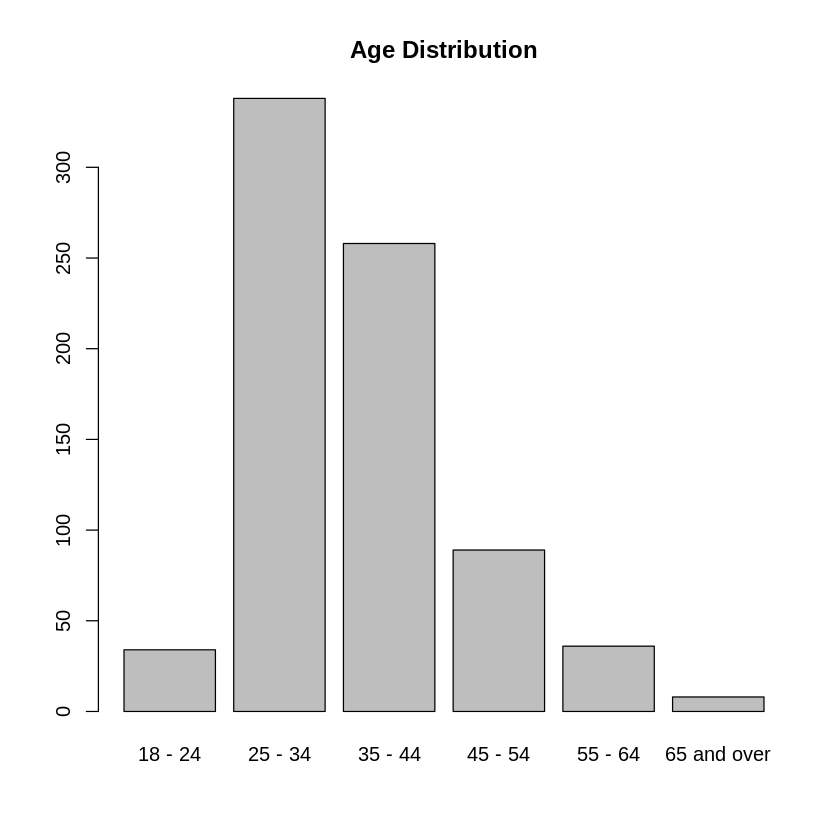

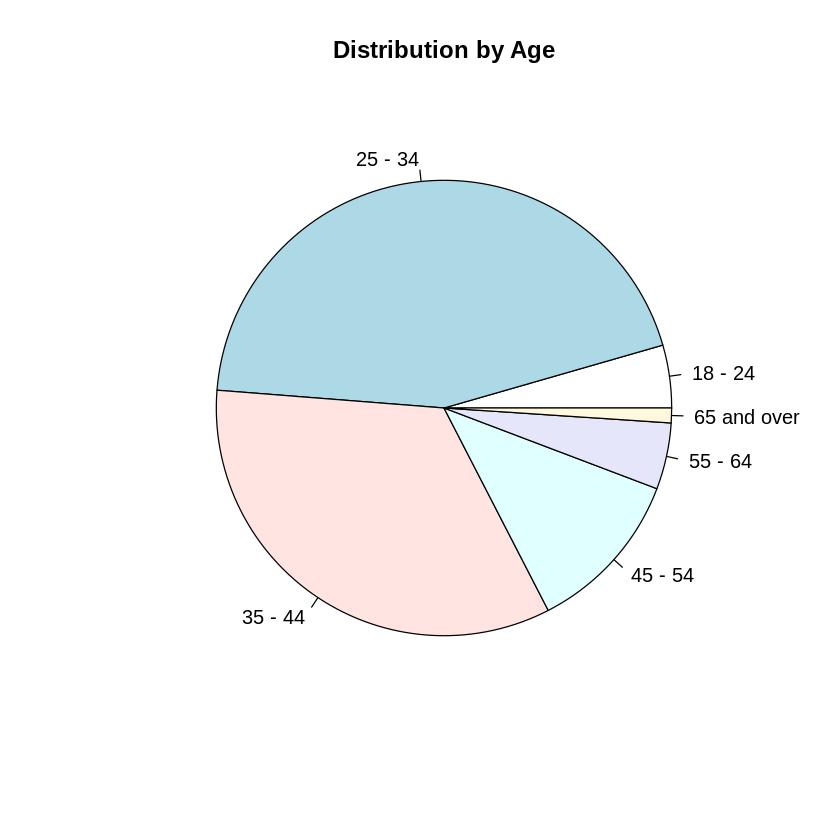

In [32]:
age <- select(data_complete, PG12Resp) %>%
    filter(PG12Resp != '')

age_dist <- factor(age[,])

print(summary(age_dist))
barplot(table(age_dist), main = 'Age Distribution')

pie(table(age_dist), main = 'Distribution by Age')

# Hypothesis

My response variable given is number of stars in GitHub, which has the abbreviation PG5_11NSG. I think the priority is going to be affected by:

Development Experience, PG6Resp
Language used , PG7Python
Purpose of project, PG1PsnUse

In [60]:
data1 <- data[ , c("PG1PsnUse","PG1WdAuth", "PG1Trn", "PG1Other", "PG2Resp", "PG4Dtr0_6", "PG4Psv7_8", "PG4Prm9_10",
                 "PG4AllResp", "PG5_11NSG", "PG6Resp", "PG8Resp", "PG9Resp","PG10Resp","PG11Resp","PG12Resp", "PG7R", 
                  "PG7Python")]
data1 <- filter(data1, PG5_11NSG != '')
summary(data1$PG5_11NSG)
data1$PG5_11NSG <- factor(data1$PG5_11NSG)
summary(data1$PG5_11NSG)
print(colnames(data1))

Essential   High Priority    Low Priority Medium Priority 
              0               6              29              89              68 
 Not a Priority 
            271

Essential   High Priority    Low Priority Medium Priority  Not a Priority 
              6              29              89              68             271

 [1] "PG1PsnUse"  "PG1WdAuth"  "PG1Trn"     "PG1Other"   "PG2Resp"   
 [6] "PG4Dtr0_6"  "PG4Psv7_8"  "PG4Prm9_10" "PG4AllResp" "PG5_11NSG" 
[11] "PG6Resp"    "PG8Resp"    "PG9Resp"    "PG10Resp"   "PG11Resp"  
[16] "PG12Resp"   "PG7R"       "PG7Python" 


In [67]:
for(i in colnames(data1))
{
    data1[,i] <- as.numeric (data1[,i]);
}
data1 <- replace(data1, is.na(data1), 0)

hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data1,.2)


,PG1PsnUse,PG1WdAuth,PG1Trn,PG1Other,PG4Dtr0_6,PG4Psv7_8,PG4Prm9_10,PG4AllResp,PG5_11NSG,PG10Resp
PG1PsnUse,1.00000,-0.2108,-0.369,-0.341,-0.0504,0.056,-0.00015,0.0097,-0.0560,0.031
PG1WdAuth,-0.21077,1.0000,-0.135,-0.081,0.0097,-0.026,0.01070,0.0147,0.0073,-0.012
PG1Trn,-0.36942,-0.1352,1.000,-0.097,0.1068,0.130,-0.17846,-0.1569,-0.0866,0.065
PG1Other,-0.34125,-0.0807,-0.097,1.000,-0.0291,-0.078,0.11775,0.1113,0.1169,-0.043
PG4Dtr0_6,-0.05040,0.0097,0.107,-0.029,1.0000,-0.192,-0.35626,-0.4707,0.0419,-0.054
PG4Psv7_8,0.05565,-0.0265,0.130,-0.078,-0.1922,1.000,-0.67062,-0.4717,-0.0770,0.113
PG4Prm9_10,-0.00015,0.0107,-0.178,0.118,-0.3563,-0.671,1.00000,0.9639,0.0586,-0.067
PG4AllResp,0.00974,0.0147,-0.157,0.111,-0.4707,-0.472,0.96394,1.0000,0.0424,-0.039
PG5_11NSG,-0.05604,0.0073,-0.087,0.117,0.0419,-0.077,0.05857,0.0424,1.0000,-0.220
PG10Resp,0.03129,-0.0123,0.065,-0.043,-0.0535,0.113,-0.06730,-0.0385,-0.2197,1.000


In [68]:
#now explore variables
summary(data1);

   PG1PsnUse      PG1WdAuth       PG1Trn        PG1Other     PG2Resp   
 Min.   : 1.0   Min.   :1.0   Min.   :1.00   Min.   : 1   Min.   :1.0  
 1st Qu.: 1.0   1st Qu.:1.0   1st Qu.:1.00   1st Qu.: 1   1st Qu.:2.0  
 Median : 3.0   Median :1.0   Median :1.00   Median : 1   Median :3.0  
 Mean   : 2.5   Mean   :1.4   Mean   :1.16   Mean   : 3   Mean   :2.8  
 3rd Qu.: 3.0   3rd Qu.:1.0   3rd Qu.:1.00   3rd Qu.: 1   3rd Qu.:3.0  
 Max.   :10.0   Max.   :5.0   Max.   :3.00   Max.   :53   Max.   :4.0  
   PG4Dtr0_6     PG4Psv7_8     PG4Prm9_10     PG4AllResp     PG5_11NSG  
 Min.   :0.0   Min.   :0.0   Min.   : 0.0   Min.   : 0.0   Min.   :1.0  
 1st Qu.:0.0   1st Qu.:0.0   1st Qu.: 0.0   1st Qu.: 8.0   1st Qu.:3.0  
 Median :0.0   Median :0.0   Median : 9.0   Median : 9.0   Median :5.0  
 Mean   :0.4   Mean   :2.1   Mean   : 5.7   Mean   : 8.2   Mean   :4.2  
 3rd Qu.:0.0   3rd Qu.:7.0   3rd Qu.:10.0   3rd Qu.:10.0   3rd Qu.:5.0  
 Max.   :6.0   Max.   :8.0   Max.   :10.0   Max.   :10.0  

In [73]:
sel = c() 
for (i in 1:dim(data1)[2]) if (is.numeric(data1[,i])) sel = c(sel, i);
cor(data1[,sel], data1[,'PG5_11NSG'], method="spearman",use="pairwise.complete.obs");
model <- lm(PG5_11NSG ~ ., data = data1)
summary(model)


PG1PsnUse,-0.05604
PG1WdAuth,0.00732
PG1Trn,-0.08662
PG1Other,0.11692
PG2Resp,0.00072
PG4Dtr0_6,0.04191
PG4Psv7_8,-0.07698
PG4Prm9_10,0.05857
PG4AllResp,0.04242
PG5_11NSG,1.00000
PG6Resp,0.10504



Call:
lm(formula = PG5_11NSG ~ ., data = data1)

Residuals:
   Min     1Q Median     3Q    Max 
-3.079 -0.622  0.380  0.722  1.748 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.9184531  0.4956513    9.92  < 2e-16 ***
PG1PsnUse   -0.0336960  0.0511906   -0.66  0.51072    
PG1WdAuth    0.0389917  0.0586941    0.66  0.50683    
PG1Trn      -0.1581938  0.1442631   -1.10  0.27342    
PG1Other     0.0091936  0.0059729    1.54  0.12446    
PG2Resp      0.0044180  0.0547172    0.08  0.93568    
PG4Dtr0_6    0.0433712  0.0489521    0.89  0.37610    
PG4Psv7_8   -0.0000824  0.0278035    0.00  0.99764    
PG4Prm9_10   0.0125582  0.0205023    0.61  0.54050    
PG4AllResp          NA         NA      NA       NA    
PG6Resp      0.0760632  0.0266038    2.86  0.00445 ** 
PG8Resp      0.0002150  0.0009208    0.23  0.81545    
PG9Resp     -0.0119683  0.0256317   -0.47  0.64078    
PG10Resp    -0.1394072  0.0400863   -3.48

INTERPRETATION AND CONCLUSION: The model has a 8.6% degree of variability, and a residual error of 0.11. Additionally, it is worth noting that the predictors coefficients is comparable thereby suggesting that my data is likely to be correlated. Correaltion is about two variables 'moving together' in a direction or path. The higher the correlation, the stronger the bond.

In turns out that my hypothesis was partly correct and the language used and and development experince do matter. But there are better significant variables like the persons english proficiancy. To do this, it consisted of parsing data and then interpreting it. Using R functions like select(), filter(), and reading into models I was able to handle the data. 

SURVEY IMPROVEMENT: It would really help to only allow a survey to be submitted if it is completed. Along side, allowing people to take the survey in various languages may help understand why in the above analysis english proficiancy was given a high significance.

Interpret correlations: onlys start vs End, calculate differene instead
